In [1]:
import pandas as pd
import numpy as np

column_names = ['RM','LSTAT','PTRATIO','MEDV']
data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\machinelearning\\machine-learning-master\\projects\\boston_housing\\housing.csv')

print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
data.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [3]:
data.info

<bound method DataFrame.info of         RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]>

In [4]:
#数据分割
from sklearn.model_selection import train_test_split

X = data[column_names[0:-1]]
y = data[column_names[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print("The max target value is",np.max(y))
print("The min target value is",np.min(y))

The max target value is 1024800.0
The min target value is 105000.0


In [5]:
X_train.shape

(366, 3)

In [6]:
X_test.shape

(123, 3)

In [8]:
#标准化standardization
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [9]:
#method1：SVR(RBF径向基核函数)
from sklearn.svm import SVR

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)
graph_rbf_svr_score = rbf_svr.score(X_test,y_test)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print('The value of default measurement is',rbf_svr.score(X_test,y_test))
print('The value of R-squared is',r2_score(y_test,rbf_svr_y_predict))
print('The mean squared error(MSE) is',mean_squared_error(y_test,rbf_svr_y_predict))
print('The mean absoluate error(MAE) is',mean_absolute_error(y_test,rbf_svr_y_predict))

The value of default measurement is -0.007199935970827465
The value of R-squared is -0.007199935970827465
The mean squared error(MSE) is 28778831320.993267
The mean absoluate error(MAE) is 126378.67673257105


In [12]:
#method2:KN距离加权回归
from sklearn.neighbors import KNeighborsRegressor

dis_knr = KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train,y_train)
dis_knr_y_predict=dis_knr.predict(X_test)
graph_dis_knr_score = dis_knr.score(X_test,y_test)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#两种调用R-squared方式等价，选择自导评估模块编写
print('The value of R-squared is',dis_knr.score(X_test,y_test))
print('The mean squared error(MSE) is',mean_squared_error(y_test,dis_knr_y_predict))
print('The mean absoluate error(MAE) is',mean_absolute_error(y_test,dis_knr_y_predict))

The value of R-squared is 0.7674617025390666
The mean squared error(MSE) is 6644341604.180752
The mean absoluate error(MAE) is 59091.89707735845


In [13]:
#method3:GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_y_predict=gbr.predict(X_test)
graph_gbr_score = gbr.score(X_test,y_test)

print('The value of R-squared is',gbr.score(X_test,y_test))
print('The mean squared error(MSE) is',mean_squared_error(y_test,gbr_y_predict))
print('The mean absoluate error(MAE) is',mean_absolute_error(y_test,gbr_y_predict))

The value of R-squared is 0.774518350915248
The mean squared error(MSE) is 6442711236.607369
The mean absoluate error(MAE) is 59380.97189990297


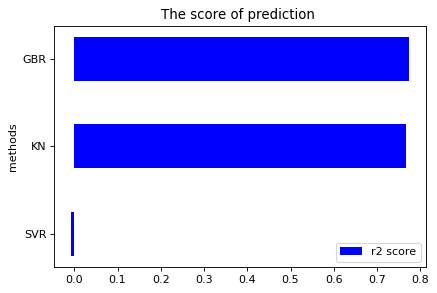

In [14]:
#图表 graph
import matplotlib.pyplot as plt

plt.figure(figsize=None,dpi=80)

number=3
values = (graph_rbf_svr_score,graph_dis_knr_score,graph_gbr_score)
index = np.arange(number)
width = 0.5
graph = plt.barh(index, values, width, label="r2 score", color="blue")

plt.ylabel('methods')
plt.title('The score of prediction ')
plt.yticks(index, ( 'SVR', 'KN',  'GBR'))
plt.legend(loc="lower right")

plt.show()

In [29]:
#方法的挑选
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column2_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('C:\\Users\Administrator\\Desktop\\machinelearning\\DIY_ML_Systems_with_Python_2nd_Edition-master\\Chapter_2\\datasets\\boston-house\\housing.data',delim_whitespace=True,names=column2_names)
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [30]:
boston2_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [31]:
boston2_data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [32]:
from sklearn.model_selection import train_test_split

X = data[column2_names[0:-1]]
y = data[column2_names[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [33]:
X_train.shape

(379, 13)

In [34]:
X_test.shape

(127, 13)

In [35]:
#标准化Standardization
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [36]:
#SVR三种核函数
from sklearn.svm import SVR

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_predict = linear_svr.predict(X_test)
graph2_linear_svr_score = linear_svr.score(X_test,y_test)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print('The value of default measurement is',linear_svr.score(X_test,y_test))

The value of default measurement is 0.650679607285236


In [37]:
from sklearn.svm import SVR

poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)
poly_svr_y_predict = poly_svr.predict(X_test)
graph2_poly_svr_score = poly_svr.score(X_test,y_test)

print('The value of default measurement is',poly_svr.score(X_test,y_test))

The value of default measurement is 0.5260404118041627


In [38]:
from sklearn.svm import SVR

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)
graph2_rbf_svr_score = rbf_svr.score(X_test,y_test)

print('The value of default measurement is',rbf_svr.score(X_test,y_test))

The value of default measurement is 0.5967521100386614


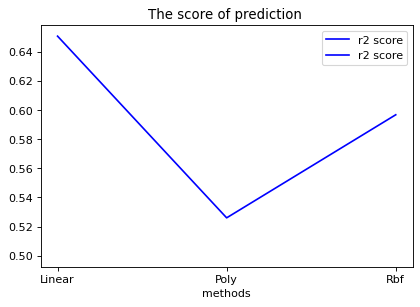

In [39]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=None,dpi=80)

values = (graph2_linear_svr_score,graph2_poly_svr_score,graph2_rbf_svr_score)
index = np.linspace(0,3,3)
 
graph = plt.plot(index, values, width, label="r2 score", color="blue")

plt.xlabel('methods')
plt.title('The score of prediction ')
plt.xticks(index, ( 'Linear', 'Poly',  'Rbf'))

plt.legend()

plt.show()